### Assignment No.1 Data Cleaning and Visualization
In this assignment you will be working on visualizing a dataset from the City of Berkeley containing data on calls to the Berkeley Police Department. Information about the dataset can be found at this link.

Note: This lab will not work on older versions of Python; make sure to work on Googe colab

**This assignment should be completed and submitted by 11:59 PM PST on Sunday, Oct 13th, 2024**

### Setup
Note that we configure a custom default figure size. Virtually every default aspect of matplotlib

In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 9)

### Part 1: Cleaning and Exploring the Data

In [ ]:
 #  Define the URL and file name
data_url = 'http://www.ds100.org/fa20/resources/assets/datasets/lab04_data_fa20.zip'
file_name = 'lab04_data_fa20.zip'
data_dir = 'data'

#  Download the ZIP file using wget
!wget -O {file_name} {data_url}

--2024-10-10 16:02:49--  http://www.ds100.org/fa20/resources/assets/datasets/lab04_data_fa20.zip
Resolving www.ds100.org (www.ds100.org)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to www.ds100.org (www.ds100.org)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ds100.org/fa20/resources/assets/datasets/lab04_data_fa20.zip [following]
--2024-10-10 16:02:50--  https://ds100.org/fa20/resources/assets/datasets/lab04_data_fa20.zip
Resolving ds100.org (ds100.org)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to ds100.org (ds100.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110072 (107K) [application/zip]
Saving to: ‘lab04_data_fa20.zip’

lab04_data_fa20.zip 100%[===================>] 107.49K  --.-KB/s    in 0.003s  

2024-10-10 16:02:50 (30.9 MB/s) - ‘lab04_data_fa20.zip’ saved [110072/110072]



In [ ]:
#  Unzip the downloaded file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# List the extracted files to verify
print("Extracted files:")
print(os.listdir(data_dir))

Extracted files:
['hello_world.py', 'do_not_readme.md', 'Berkeley_PD_-_Calls_for_Service.csv', 'dummy.txt', 'ben_kurtovic.py']


Below, we use pathlib's glob method to store the list of all files' names from the data_dir directory in the variable file_names. These names should be strings that contain only the file name (e.g. dummy.txt not data/dummy.txt). The asterisk (*) character is used with the glob method to match any string

In [ ]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['hello_world.py',
 'do_not_readme.md',
 'Berkeley_PD_-_Calls_for_Service.csv',
 'dummy.txt',
 'ben_kurtovic.py']

Let's now load the CSV file we have into a pandas.DataFrame object.

In [ ]:
# Step: Load a specific CSV file from the extracted contents
csv_file_path = os.path.join(data_dir, 'Berkeley_PD_-_Calls_for_Service.csv')
calls = pd.read_csv(csv_file_path)

In [ ]:
#display datasets
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA


We see that the fields include a case number, the offense type, the date and time of the offense, the "CVLEGEND" which appears to be related to the offense type, a "CVDOW" which has no apparent meaning, a date added to the database, and the location spread across four fields.

Let's also check some basic information about these files using the DataFrame.info and DataFrame.describe methods.

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASENO          3788 non-null   int64 
 1   OFFENSE         3788 non-null   object
 2   EVENTDT         3788 non-null   object
 3   EVENTTM         3788 non-null   object
 4   CVLEGEND        3788 non-null   object
 5   CVDOW           3788 non-null   int64 
 6   InDbDate        3788 non-null   object
 7   Block_Location  3788 non-null   object
 8   BLKADDR         3766 non-null   object
 9   City            3788 non-null   object
 10  State           3788 non-null   object
dtypes: int64(2), object(9)
memory usage: 325.7+ KB


Note that the BLKADDR column only has 3766 non-null entries, while the other columns all have 3788 entries. This is because the .info() method only counts non-null entries.

In [ ]:
calls.describe()

,CASENO,CVDOW
count,3.788000e+03,3788.000000
mean,1.804387e+07,2.997888
std,2.665970e+04,1.952160
min,1.801375e+07,0.000000
25%,1.802444e+07,1.000000
50%,1.803530e+07,3.000000
75%,1.804537e+07,5.000000
max,1.809135e+07,6.000000


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further in Question 1.

Before we go over the fields to see their meanings, the cell below will verify that all the events happened in Berkeley by grouping on the City and State columns. You should see that all of our data falls into one group.

In [ ]:
calls.groupby(["City","State"]).count()

,,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR
City,State,,,,,,,,,
Berkeley,CA,3788,3788,3788,3788,3788,3788,3788,3788,3766


When we called head() on the Dataframe data, it seemed like OFFENSE and CVLEGEND both contained information about the type of event reported. What is the difference in meaning between the two columns? One way to probe this is to look at the value_counts for each Series.

In [ ]:
calls['OFFENSE'].value_counts().head(10)

,count
OFFENSE,
BURGLARY AUTO,658
THEFT MISD. (UNDER $950),633
DISTURBANCE,277
VANDALISM,248
VEHICLE STOLEN,235
THEFT FELONY (OVER $950),214
BURGLARY RESIDENTIAL,194
ASSAULT/BATTERY MISD.,190
ROBBERY,168


In [ ]:
calls['CVLEGEND'].value_counts().head(10)

,count
CVLEGEND,
LARCENY,871
BURGLARY - VEHICLE,658
DISORDERLY CONDUCT,279
ASSAULT,263
VANDALISM,248
MOTOR VEHICLE THEFT,235
FRAUD,208
BURGLARY - RESIDENTIAL,194
ROBBERY,168


It seems like OFFENSE is more specific than CVLEGEND, e.g. "LARCENY" vs. "THEFT FELONY (OVER $950)". If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.

To get a sense of how many subcategories there are for each OFFENSE, we will set calls_by_cvlegend_and_offense equal to a multi-indexed series where the data is first indexed on the CVLEGEND and then on the OFFENSE, and the data is equal to the number of offenses in the database that match the respective CVLEGEND and OFFENSE. As you can see, calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"] returns 24 which means there are 24 instances of larceny with offense of type "THEFT FROM PERSON" in the database.

In [ ]:
calls_by_cvlegend_and_offense = calls.groupby(["CVLEGEND", "OFFENSE"]).size()
calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]

24

### Question 1
In the cell below, set answer1 equal to a list of strings corresponding to the possible values for OFFENSE when CVLEGEND is "LARCENY". You can type the answer manually, or you can create an expression that automatically extracts the names.

In [ ]:
# check the answer
calls_by_cvlegend_and_offense[10:20]

CVLEGEND                OFFENSE                 
FAMILY OFFENSE          DOMESTIC VIOLENCE           108
FRAUD                   FRAUD/FORGERY                95
                        IDENTITY THEFT              113
HOMICIDE                HOMICIDE                      1
KIDNAPPING              KIDNAPPING                    6
LARCENY                 THEFT FELONY (OVER $950)    214
                        THEFT FROM PERSON            24
                        THEFT MISD. (UNDER $950)    633
LARCENY - FROM VEHICLE  THEFT FROM AUTO              87
LIQUOR LAW VIOLATION    ALCOHOL OFFENSE              53
dtype: int64

In [ ]:
answer1 = calls_by_cvlegend_and_offense['LARCENY'].index.tolist()


### Part 2: Visualization
#### Pandas Examples
Pandas offers basic functionality for plotting. For example, the DataFrame and Series classes both have a plot method.

As you learn to do data visualization, you may find the pandas plotting documentation helpful!

As an example of the built-in plotting functionality of pandas, the following example uses plot method of the Series class to generate a barh plot type to visually display the value counts for CVLEGEND.

There are also many other plots that we will explore throughout the lab.

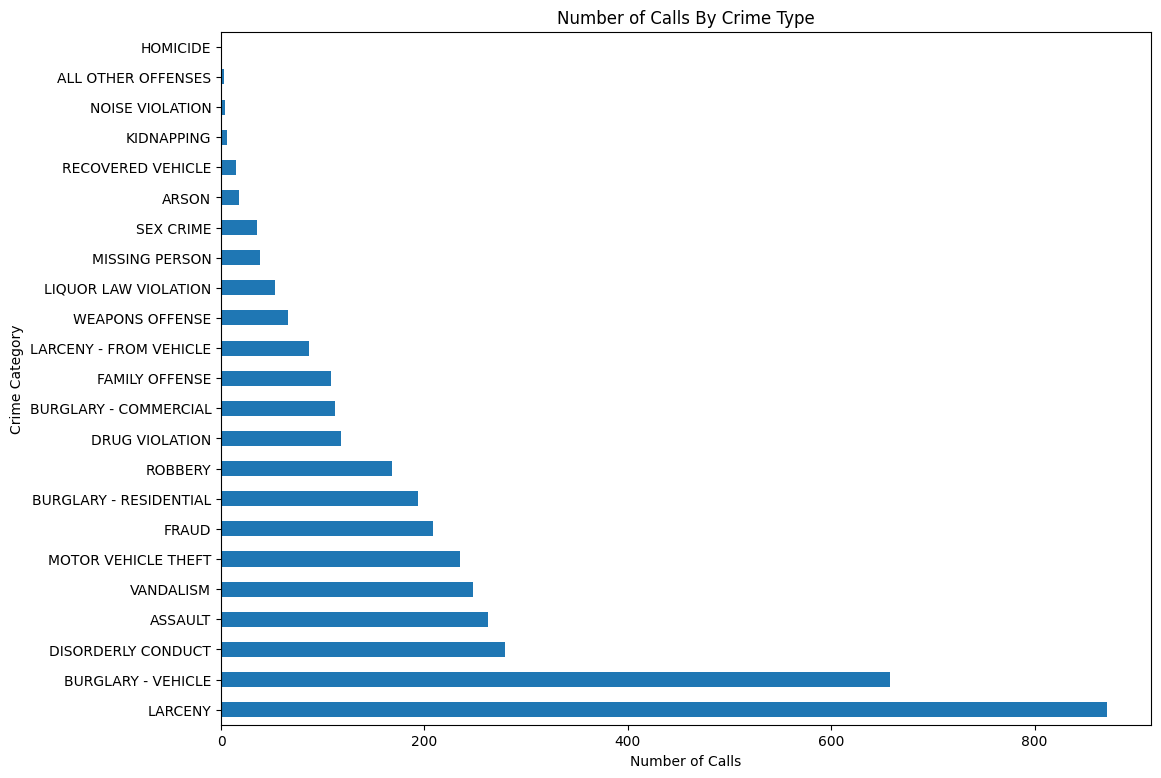

In [ ]:
ax = calls['CVLEGEND'].value_counts().plot(kind='barh')
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");
ax2 = plt.gca()

#### Question 2
Now it is your turn to make some plots using pandas. Let's start by transforming the data so that it is easier to work with. We then will look at some distributions of the data.

The CVDOW field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website linked at the top of this notebook, CVDOW is actually indicating the day that events happened. 0->Sunday, 1->Monday ... 6->Saturday.

In [ ]:
# practice here


### Question 2a
Add a new column Day into the calls DataFrame that has the string weekday (eg. 'Sunday') for the corresponding value in CVDOW. For example, if the first 3 values of CVDOW are [3, 6, 0], then the first 3 values of the Day column should be ["Wednesday", "Saturday", "Sunday"].

Hint: Try using the Series.map function on calls["CVDOW"]. Can you assign this to the new column calls["Day"]?

In [ ]:
#Write your answer here

### Question 2b
Now let's look at the EVENTTM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named Hour in the calls DataFrame. You should save the hour as an int.

Hint: Your code should only require one line

In [ ]:
#Write your answer here


### Question 2c
Using pandas, construct a line plot with the count of the number of calls (entries in the table) for each hour of the day ordered by the time (eg. 12:00 AM, 1:00 AM, ...). Please use the provided variable hours in your answer. Be sure that your axes are labeled and that your plot is titled.

In [ ]:
#Write your answer here

### Question 3
We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the CVLEGEND "ROBBERY".

### Question 3a
Use pandas to create a vertical bar plot of the number of total robberies reported on each day of the week, again ordered by the days of the week starting with Sunday. Please use the provided variable filtered in your answer. Be sure that your axes are labeled and that your plot is titled.

Hint: This should be very similar to Question 2c

In [ ]:
#Write your answer here


### Question 3b
Do you observe anything interesting about the distribution of ROBBERY calls over a week? Which day is the peak for "ROBBERY"? Type a 1-2 sentence answer below.

In [ ]:
#Write your answer below

#### Question 4
In the cell below, generate a boxplot which examines the hour of day of each crime broken down by the CVLEGEND value. To construct this plot use the DataFrame.boxplot documentation. You may want to rotate the CVLEGEND labels for better readability.

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into answer4 as a string.

### Submission
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.  